In [1]:
!nvidia-smi

Tue Sep 10 13:09:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Creating a link to my google drive
!ln -s /content/drive/My\ Drive/ /mydrive

In [4]:
%cd /mydrive/Ac

/content/drive/My Drive/Ac


In [5]:
#!git clone https://github.com/WongKinYiu/yolov9.git

In [6]:
%cd yolov9/

/content/drive/My Drive/Ac/yolov9


In [7]:
#!pip install -r requirements.txt

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


Dowloading YoloV9 - Pretrained Weights

In [8]:
#!wget -P /mydrive/Ac https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
#!wget -P /mydrive/Ac https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [9]:
# Test Image for Inference
#!python detect.py --weights /mydrive/Ac/yolov9-e.pt --source /mydrive/Ac/images.jpeg --device 0

detect: weights=['/mydrive/Ac/yolov9-e.pt'], source=/mydrive/Ac/images.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Ac/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default 

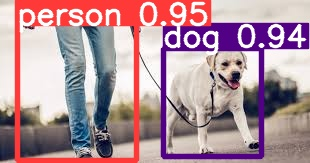

In [ ]:
from IPython.display import Image
Image(filename=f"/mydrive/Ac/yolov9/runs/detect/exp6/images.jpeg", width=600)

Training YoloV9 on Custom Dataset

In [14]:
#%cd /mydrive/Ac/yolov9/

/content/drive/My Drive/Ac/yolov9


In [17]:
#!ls /content/drive/MyDrive/Ac/yolov9/data/hyps/


hyp.scratch-high.yaml


In [20]:
!python train_dual.py --workers 8 --batch 4 --epochs 10 --img 640 --device 0 --data /mydrive/Ac/yolov9/data.yaml --weights /mydrive/Ac/yolov9-e.pt --device 0 --cfg /mydrive/Ac/yolov9/models/detect/custom_yolov9.yaml --hyp /mydrive/Ac/yolov9/data/hyps/hyp.scratch-high.yaml

2024-09-10 13:20:00.889388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 13:20:00.924806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 13:20:00.934428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 13:20:00.956839: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 13:20:02.784277: W tensorflow/comp

In [22]:
!python detect.py --img 1280 --conf 0.1 --device 0 --weights /mydrive/Ac/yolov9/runs/train/exp3/weights/best.pt --source /mydrive/Ac/crash.jpeg

detect: weights=['/mydrive/Ac/yolov9/runs/train/exp3/weights/best.pt'], source=/mydrive/Ac/crash.jpeg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/drive/MyDrive/Ac/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a f

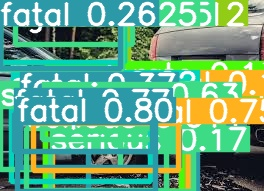

In [25]:
from IPython.display import Image
Image(filename=f"/mydrive/Ac/yolov9/runs/detect/exp9/crash.jpeg", width=600)